In [229]:
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import json
import nltk
import random
import numpy as np
from random import seed

In [230]:
model = load_model('../chatbot/chatbot_model.h5')

In [231]:
lemmatizer = WordNetLemmatizer()
op = open('intents.json', encoding="utf8")
intents = json.load(op)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [232]:
words = []
classes = []
documents = []
ignoreLetters = ['?', '!', '.', '.']

In [233]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordList = nltk.word_tokenize(pattern)
        words.extend(wordList)
        documents.append((wordList, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [234]:
words = [stemmer.stem(word) for word in words if word not in ignoreLetters]
wrodds = sorted(set(words))
classes = sorted(set(classes))

In [235]:
training = []
outputEmpty = [0] * len(classes)

In [236]:
for document in documents:
    # print(document)
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words:
        bag.append(1) if word in wordPatterns else bag.append(0)
    
    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append([bag, outputRow])

In [237]:
random.shuffle(training)
training = np.array(training, dtype='object')

x = list(training[:, 0])
y = list(training[:, 1])

In [238]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=80, random_state = 20)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, train_size=80, random_state = 42)

In [239]:
# from sklearn.model_selection import cross_val_score
# acc = cross_val_score(estimator= model, x = x_train, y=y_train, cv=10)

In [240]:
ypred = model.predict(x_test)

1/1 [==============================] - 0s 82ms/step


In [241]:
print(ypred)

[[3.02362666e-02 1.33360680e-02 1.82429664e-02 ... 5.15174761e-04
  2.09216215e-02 1.27200305e-03]
 [7.81903680e-07 1.46193606e-05 1.07911046e-06 ... 5.34081721e-07
  1.40526731e-06 1.83936010e-07]
 [7.20120090e-13 6.00031093e-14 2.27109402e-17 ... 2.96132503e-13
  1.58654354e-10 1.80736882e-13]
 ...
 [7.93151989e-10 1.04676552e-08 9.82861863e-08 ... 8.67599326e-08
  5.59355975e-08 2.40696380e-07]
 [4.49848812e-06 6.64710775e-09 2.56595301e-11 ... 1.12015684e-07
  1.36623939e-05 1.04934923e-08]
 [3.74616211e-14 1.75732237e-06 2.10897126e-14 ... 8.54916277e-11
  6.01361877e-11 3.31626637e-09]]


In [242]:
y_temp = np.argmax(ypred, axis=0)
len(y_temp)

66

In [243]:
ypred_arg= np.argmax(ypred, axis= 1)
ytest_arg= np.argmax(y_test, axis= 1)

In [244]:
from sklearn.metrics import confusion_matrix
# ass1 = confusion_matrix(ytest_arg, ypred_arg)
ass1 = confusion_matrix(ytest_arg, ypred_arg)

In [245]:
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
from sklearn.metrics import ConfusionMatrixDisplay
import numpy
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix= ass1, display_labels=[False, True])
cm_display.plot
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [246]:
len(ass1)

20

In [247]:
import pandas as pd
cm_df = pd.DataFrame(ass1)

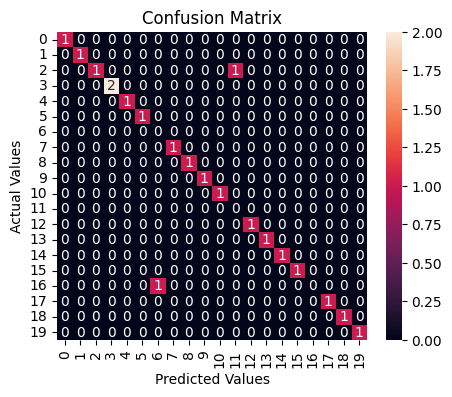

<Figure size 1600x1600 with 0 Axes>

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.figure(figsize=(16,16), dpi=100)
plt.show()

In [249]:
# FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
# FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
# TP = np.diag(confusion_matrix)
# TN = confusion_matrix.values.sum() - (FP + FN + TP)

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)

# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)


# for cls in range(CM.shape[0]):
#     print(f'[Class {cls} vs others]')
#     TP, FN, FP, TN = confusion_matrix_for(cls, CM).ravel()
#     print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
#     # compute your metrics (your code in the question)
#     print()

In [250]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

TP1= 0
FN1= 0
FP1= 0
TN1= 0

for cls in range(ass1.shape[0]):
    print(f'[Class {cls} vs others]')
    TP, FN, FP, TN = confusion_matrix_for(cls, ass1).ravel()
    # compute your metrics (your code in the question)
    TP1+= TP
    FN1+= FN
    FP1+= FP
    TN1+= TN
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
    
    print()
    
print(f'TP: {TP1}, FN: {FN1}, FP: {FP1}, TN: {TN1}')
precc = TP1/(TP1+FP1)
recall = TP1/(TP1+FN1)
f1score = 2*(precc*recall)/(recall+precc)
acc = (TP1+TN1)/(TP1+TN1+FP1+FN1)
print(f'accuracy : {acc}; precission : {precc}; recall : {recall}; F-1 Score : {f1score}')


[Class 0 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 1 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 2 vs others]
TP: 1, FN: 1, FP: 0, TN: 18

[Class 3 vs others]
TP: 2, FN: 0, FP: 0, TN: 18

[Class 4 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 5 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 6 vs others]
TP: 0, FN: 0, FP: 1, TN: 19

[Class 7 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 8 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 9 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 10 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 11 vs others]
TP: 0, FN: 0, FP: 1, TN: 19

[Class 12 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 13 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 14 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 15 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 16 vs others]
TP: 0, FN: 1, FP: 0, TN: 19

[Class 17 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 18 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

[Class 19 vs others]
TP: 1, FN: 0, FP: 0, TN: 19

TP: 18, FN

In [251]:
# FP = sum(ass1.sum(axis=0) - np.diag(ass1))
# FN = sum(ass1.sum(axis=1) - np.diag(ass1))
# TP = sum(np.diag(ass1))
# TN = ass1.sum()# - (FP+FN+TP)

FP = ass1.sum(axis=0) - np.diag(ass1) 
FN = ass1.sum(axis=1) - np.diag(ass1)
TP = np.diag(ass1)
TN = ass1.sum() - (FP + FN + TP)

print(sum(TP))
print(sum(TN))
print(sum(FP))
print(sum(FN))

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print('======')
print(TPR)
print(TNR)
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)

18
378
2
2
[1.  1.  0.5 1.  1.  1.  nan 1.  1.  1.  1.  nan 1.  1.  1.  1.  0.  1.
 1.  1. ]
[1.   1.   1.   1.   1.   1.   0.95 1.   1.   1.   1.   0.95 1.   1.
 1.   1.   1.   1.   1.   1.  ]
[ 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1. nan  1.
  1.  1.]
[1.         1.         0.94736842 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.95       1.
 1.         1.        ]
[0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.05 0.   0.
 0.   0.   0.   0.   0.   0.  ]
[0.  0.  0.5 0.  0.  0.  nan 0.  0.  0.  0.  nan 0.  0.  0.  0.  1.  0.
 0.  0. ]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0. nan  0.
  0.  0.]


C:\Users\ovisa\AppData\Local\Temp\ipykernel_9076\3258241693.py:17: RuntimeWarning: invalid value encountered in divide
  TPR = TP/(TP+FN)
C:\Users\ovisa\AppData\Local\Temp\ipykernel_9076\3258241693.py:21: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
C:\Users\ovisa\AppData\Local\Temp\ipykernel_9076\3258241693.py:27: RuntimeWarning: invalid value encountered in divide
  FNR = FN/(TP+FN)
C:\Users\ovisa\AppData\Local\Temp\ipykernel_9076\3258241693.py:29: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)


In [252]:
from sklearn.metrics import precision_score
precision_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1.])

In [253]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest_arg, ypred_arg)
# b= seed(a = accuracy_score(ytest_arg, ypred_arg))
# print(b)

0.9

In [254]:
from sklearn.metrics import recall_score
recall_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1. , 1. , 0.5, 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. , 1. ,
       1. , 1. , 1. , 0. , 1. , 1. , 1. ])

In [255]:
from sklearn.metrics import classification_report
 
print(classification_report(ytest_arg, ypred_arg))


              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          36       0.00      0.00      0.00         0
          37       1.00      1.00      1.00         1
          38       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          41       1.00      1.00      1.00         1
          47       0.00      0.00      0.00         1
          50       1.00    

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [256]:
from sklearn import metrics
ass1_display = metrics.ConfusionMatrixDisplay(confusion_matrix=ass1, display_labels=[False, True])



====================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error======================================================================================================================================================trial n error==================================================================================================================================

In [257]:
#predict berdasarkan data pada x_test
x_pred = model.predict(x_test)

1/1 [==============================] - 0s 43ms/step


In [258]:
x_pred

array([[3.02362666e-02, 1.33360680e-02, 1.82429664e-02, ...,
        5.15174761e-04, 2.09216215e-02, 1.27200305e-03],
       [7.81903680e-07, 1.46193606e-05, 1.07911046e-06, ...,
        5.34081721e-07, 1.40526731e-06, 1.83936010e-07],
       [7.20120090e-13, 6.00031093e-14, 2.27109402e-17, ...,
        2.96132503e-13, 1.58654354e-10, 1.80736882e-13],
       ...,
       [7.93151989e-10, 1.04676552e-08, 9.82861863e-08, ...,
        8.67599326e-08, 5.59355975e-08, 2.40696380e-07],
       [4.49848812e-06, 6.64710775e-09, 2.56595301e-11, ...,
        1.12015684e-07, 1.36623939e-05, 1.04934923e-08],
       [3.74616211e-14, 1.75732237e-06, 2.10897126e-14, ...,
        8.54916277e-11, 6.01361877e-11, 3.31626637e-09]], dtype=float32)

In [259]:
#numpy argmax dengan axis1 pada data hasil prediction
x_predargmax = np.argmax(x_pred, axis= 1)
x_predargmax

array([11, 25, 41,  4, 65,  2, 37,  6, 14,  3, 23,  7, 10, 59, 15, 36, 40,
        6, 38, 50], dtype=int64)

In [260]:
#numpy argmax dengan axis1 pada data aslinya
x_truearg = np.argmax(x_test, axis= 1)
x_truearg

array([  0, 163, 125, 253,  53, 212, 264, 259, 204, 227, 167, 221, 285,
        42,  45, 210,  13, 257, 216,  23], dtype=int64)

In [261]:
y

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  

In [262]:
#cf disusun berdasarkan data asli dan dan data prediction
#kedua parameter jumlah labelnya harus sama
from sklearn.metrics import confusion_matrix
confusion_matrix(x_truearg, x_predargmax)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [263]:
ass = confusion_matrix(x_truearg, x_predargmax)

In [264]:
import pandas as pd

In [265]:
cm_df = pd.DataFrame(ass)

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

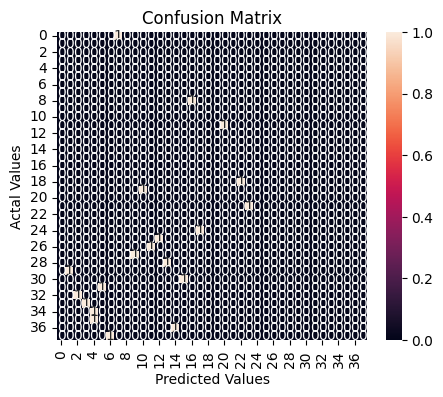

In [267]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(x_truearg, x_predargmax)

0.0

In [269]:
from sklearn.metrics import precision_score
precision_score(x_truearg, x_predargmax, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])